In [2]:
!apt-get install -y -qq software-properties-common python-software-properties module-init-tools
!add-apt-repository -y ppa:alessandro-strada/ppa 2>&1 > /dev/null
!apt-get update -qq 2>&1 > /dev/null
!apt-get -y install -qq google-drive-ocamlfuse fuse
from google.colab import auth
auth.authenticate_user()
from oauth2client.client import GoogleCredentials
creds = GoogleCredentials.get_application_default()
import getpass
!google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret} < /dev/null 2>&1 | grep URL
vcode = getpass.getpass()
!echo {vcode} | google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret}

Please, open the following URL in a web browser: https://accounts.google.com/o/oauth2/auth?client_id=32555940559.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive&response_type=code&access_type=offline&approval_prompt=force
··········
Please, open the following URL in a web browser: https://accounts.google.com/o/oauth2/auth?client_id=32555940559.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive&response_type=code&access_type=offline&approval_prompt=force
Please enter the verification code: Access token retrieved correctly.


In [0]:
!mkdir -p drive
!google-drive-ocamlfuse drive

In [0]:
import os
os.chdir('drive/sentiment analysis/')

In [5]:
!ls

lstm example keras model    sent_lstm_1layer+dropout.h5  sent_rnn_2layer.h5
sent_gru_1layer+dropout.h5  sent_lstm_1layer.h5		 tensoflow.ipynb
sent_gru_1layer.h5	    sent_lstm_2layer+dropout.h5  TensorFlow.pdf
sent_gru_2layer+dropout.h5  sent_lstm_2layer.h5		 test.ipynb
sent_gru_2layer.h5	    sent_rnn_1layer+dropout.h5	 Untitled document.odt
sentiment.ipynb		    sent_rnn_2layer+dropout.h5


In [6]:
from keras.datasets import imdb

Using TensorFlow backend.


In [7]:
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words = 5000,oov_char=0)

17465344/17464789 [==============================] - 1s 0us/step


In [0]:
import numpy as np

In [0]:
import keras

In [0]:
x_train = keras.preprocessing.sequence.pad_sequences(x_train, maxlen=150)
x_test = keras.preprocessing.sequence.pad_sequences(x_test, maxlen=150)


In [0]:
from sklearn.utils import class_weight
class_weights = class_weight.compute_class_weight('balanced',
                                                 np.unique(y_train),
                                                 y_train)

In [27]:
class_weights

array([1., 1.])

In [0]:
y = np.zeros((y_train.shape[0],2))
for i in range(y.shape[0]):
  y[i,y_train[i]] = 1
y_train = y  

In [0]:
y = np.zeros((y_test.shape[0],2))
for i in range(y.shape[0]):
  y[i,int(y_test[i])] = 1
y_test = y  

In [34]:
y_train.shape

(25000, 2)

not gonna use this for now

In [0]:
X = np.zeros((x_train.shape[0],x_train.shape[1],502))
for i in range(X.shape[0]):
  for j in range(X.shape[1]):
    X[i,j,x_train[i,j]] = 1

In [0]:
from keras.models import Sequential 
from keras.layers import Embedding,LSTM,Dense,GRU,SimpleRNN

In [9]:
embed_dim = 128
lstm_out = 64
batch_size = 32

model = Sequential()
model.add(Embedding(5000, embed_dim))
#model.add(GRU(lstm_out,return_sequences=True,dropout=0.2, recurrent_dropout=0.2))
model.add(GRU(32,dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1,activation='sigmoid'))
model.compile(loss = 'binary_crossentropy', optimizer='adam',metrics = ['accuracy'])
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 128)         640000    
_________________________________________________________________
gru_1 (GRU)                  (None, 32)                15456     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 33        
Total params: 655,489
Trainable params: 655,489
Non-trainable params: 0
_________________________________________________________________
None


In [0]:
info = model.fit(x_train,y_train,validation_data=(x_test,y_test),batch_size = batch_size,epochs=5)

In [0]:
model.save('sent_rnn_1layer+dropout.h5')

Testing

In [0]:
model = keras.models.load_model('sent_gru_1layer+dropout.h5')

In [20]:
model.evaluate(x_test,y_test,batch_size=25000)

25000/25000 [==============================] - 1s 26us/step


[0.35424134135246277, 0.8545600175857544]

Time on CPU

In [13]:
model.evaluate(x_test,y_test,batch_size = 32)

25000/25000 [==============================] - 23s 906us/step


[0.35424133187294005, 0.85456]

without dropout

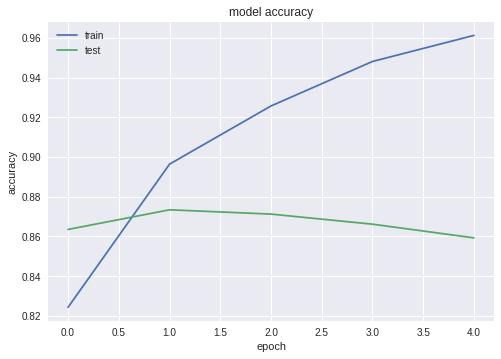

In [20]:
import matplotlib.pyplot as plt
plt.plot(info.history['acc'])
plt.plot(info.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

with dropout

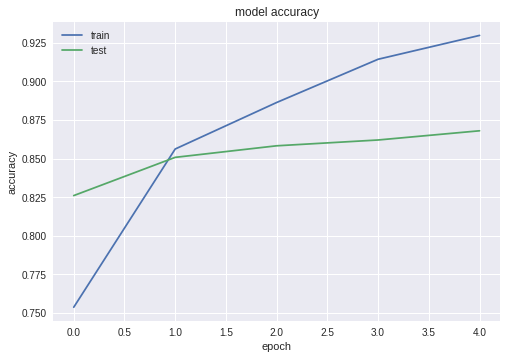

In [24]:
import matplotlib.pyplot as plt
plt.plot(info.history['acc'])
plt.plot(info.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [34]:
embed_dim = 128
lstm_out = 64
batch_size = 32

model = Sequential()
model.add(Embedding(5000, embed_dim))
#model.add(SimpleRNN(lstm_out,return_sequences=True,dropout=0.2, recurrent_dropout=0.2))
model.add(SimpleRNN(32,dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(2,activation='softmax'))
model.compile(loss = 'categorical_crossentropy', optimizer='adam',metrics = ['accuracy'])
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_6 (Embedding)      (None, None, 128)         640000    
_________________________________________________________________
simple_rnn_3 (SimpleRNN)     (None, 32)                5152      
_________________________________________________________________
dense_5 (Dense)              (None, 2)                 66        
Total params: 645,218
Trainable params: 645,218
Non-trainable params: 0
_________________________________________________________________
None


In [28]:
info = model.fit(x_train,y_train,validation_data=(x_test,y_test),batch_size = batch_size,epochs=5)

Train on 25000 samples, validate on 25000 samples
Epoch 1/5
22080/25000 [=========================>....] - ETA: 23s - loss: 0.7227 - acc: 0.5123

25000/25000 [==============================] - 242s 10ms/step - loss: 0.7193 - acc: 0.5156 - val_loss: 0.6906 - val_acc: 0.5343
Epoch 2/5
13184/25000 [==============>...............] - ETA: 1:32 - loss: 0.6891 - acc: 0.5416

25000/25000 [==============================] - 239s 10ms/step - loss: 0.6849 - acc: 0.5484 - val_loss: 0.6664 - val_acc: 0.5751
Epoch 3/5
 9824/25000 [==========>...................] - ETA: 1:59 - loss: 0.6614 - acc: 0.5905

25000/25000 [==============================] - 239s 10ms/step - loss: 0.6642 - acc: 0.5839 - val_loss: 0.6679 - val_acc: 0.5768
Epoch 4/5
 8544/25000 [=========>....................] - ETA: 2:08 - loss: 0.6473 - acc: 0.6080

25000/25000 [==============================] - 238s 10ms/step - loss: 0.6480 - acc: 0.6087 - val_loss: 0.6683 - val_acc: 0.5793
Epoch 5/5
 8064/25000 [========>.....................] - ETA: 2:12 - loss: 0.6211 - acc: 0.6452

25000/25000 [==============================] - 237s 9ms/step - loss: 0.6290 - acc: 0.6354 - val_loss: 0.6655 - val_acc: 0.5882


In [0]:
model.save('sent_rnn_2layer+dropout.h5')

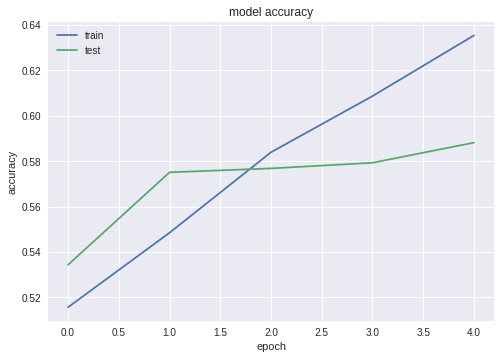

In [30]:
import matplotlib.pyplot as plt
plt.plot(info.history['acc'])
plt.plot(info.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [31]:
info = model.fit(x_train,y_train,validation_data=(x_test,y_test),batch_size = batch_size,epochs=5)

Train on 25000 samples, validate on 25000 samples
Epoch 1/5
22080/25000 [=========================>....] - ETA: 22s - loss: 0.6063 - acc: 0.6617

25000/25000 [==============================] - 237s 9ms/step - loss: 0.6089 - acc: 0.6601 - val_loss: 0.6749 - val_acc: 0.5923
Epoch 2/5
13248/25000 [==============>...............] - ETA: 1:31 - loss: 0.5905 - acc: 0.6760

25000/25000 [==============================] - 238s 10ms/step - loss: 0.5911 - acc: 0.6752 - val_loss: 0.6684 - val_acc: 0.6061
Epoch 3/5
 9856/25000 [==========>...................] - ETA: 1:57 - loss: 0.5662 - acc: 0.7056

25000/25000 [==============================] - 238s 10ms/step - loss: 0.5691 - acc: 0.6999 - val_loss: 0.6676 - val_acc: 0.6132
Epoch 4/5
 8544/25000 [=========>....................] - ETA: 2:07 - loss: 0.5353 - acc: 0.7310

25000/25000 [==============================] - 238s 10ms/step - loss: 0.5489 - acc: 0.7167 - val_loss: 0.6670 - val_acc: 0.6164
Epoch 5/5
 8064/25000 [========>.....................] - ETA: 2:11 - loss: 0.5204 - acc: 0.7427

25000/25000 [==============================] - 237s 9ms/step - loss: 0.5307 - acc: 0.7331 - val_loss: 0.6801 - val_acc: 0.6328


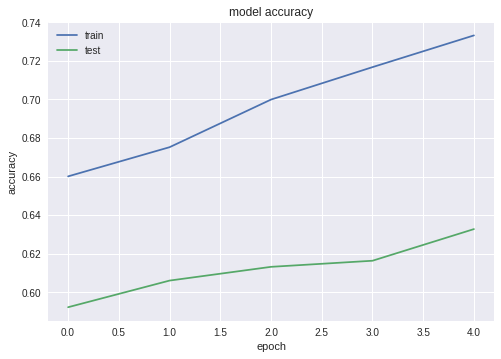

In [33]:
import matplotlib.pyplot as plt
plt.plot(info.history['acc'])
plt.plot(info.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [35]:
info = model.fit(x_train,y_train,validation_data=(x_test,y_test),batch_size = batch_size,epochs=5)

Train on 25000 samples, validate on 25000 samples
Epoch 1/5
22112/25000 [=========================>....] - ETA: 12s - loss: 0.6913 - acc: 0.5426

25000/25000 [==============================] - 127s 5ms/step - loss: 0.6890 - acc: 0.5454 - val_loss: 0.6608 - val_acc: 0.5840
Epoch 2/5
13312/25000 [==============>...............] - ETA: 48s - loss: 0.6414 - acc: 0.6182

25000/25000 [==============================] - 126s 5ms/step - loss: 0.6355 - acc: 0.6224 - val_loss: 0.6182 - val_acc: 0.6382
Epoch 3/5
 9952/25000 [==========>...................] - ETA: 1:02 - loss: 0.5692 - acc: 0.6946

25000/25000 [==============================] - 126s 5ms/step - loss: 0.5599 - acc: 0.6998 - val_loss: 0.5476 - val_acc: 0.7186
Epoch 4/5
 8672/25000 [=========>....................] - ETA: 1:07 - loss: 0.4823 - acc: 0.7687

25000/25000 [==============================] - 125s 5ms/step - loss: 0.4953 - acc: 0.7595 - val_loss: 0.5976 - val_acc: 0.6898
Epoch 5/5
 8192/25000 [========>.....................] - ETA: 1:09 - loss: 0.4579 - acc: 0.7825

25000/25000 [==============================] - 126s 5ms/step - loss: 0.4549 - acc: 0.7869 - val_loss: 0.5376 - val_acc: 0.7386


In [0]:
model.save('sent_rnn_1layer+dropout.h5')

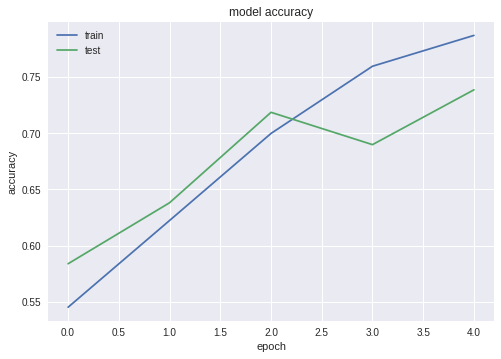

In [37]:
import matplotlib.pyplot as plt
plt.plot(info.history['acc'])
plt.plot(info.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [45]:
   embed_dim = 128
lstm_out = 128
batch_size = 32

model = Sequential()
model.add(Embedding(5000, embed_dim))
#model.add(GRU(lstm_out,return_sequences=True))
model.add(GRU(32))
model.add(Dense(2,activation='softmax'))
model.compile(loss = 'categorical_crossentropy', optimizer='adam',metrics = ['accuracy'])
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_10 (Embedding)     (None, 250, 128)          128       
_________________________________________________________________
gru_1 (GRU)                  (None, 250, 128)          98688     
_________________________________________________________________
gru_2 (GRU)                  (None, 32)                15456     
_________________________________________________________________
dense_5 (Dense)              (None, 2)                 66        
Total params: 114,338
Trainable params: 114,338
Non-trainable params: 0
_________________________________________________________________
None


In [46]:
info = model.fit(x_train,y_train,validation_data=(x_test,y_test),batch_size = batch_size,epochs=2)

Train on 25000 samples, validate on 25000 samples
Epoch 1/2
22016/25000 [=========================>....] - ETA: 1:27 - loss: 0.0092 - acc: 0.4995

25000/25000 [==============================] - 900s 36ms/step - loss: 0.0081 - acc: 0.5001 - val_loss: 1.1921e-07 - val_acc: 0.5000
Epoch 2/2
12672/25000 [==============>...............] - ETA: 6:01 - loss: 1.1921e-07 - acc: 0.5039

25000/25000 [==============================] - 896s 36ms/step - loss: 1.1921e-07 - acc: 0.5000 - val_loss: 1.1921e-07 - val_acc: 0.5000


In [0]:
model.save('sent_gru_2layer.h5')

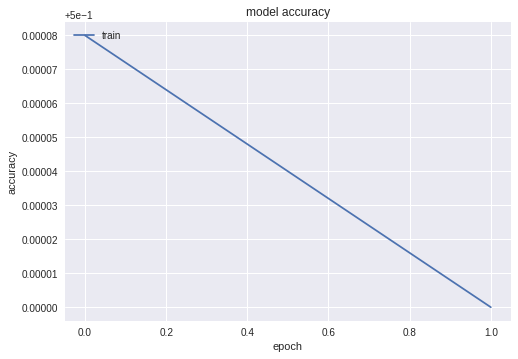

In [49]:
import matplotlib.pyplot as plt
plt.plot(info.history['acc'])
#plt.plot(m_info.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [0]:
from keras.layers import SimpleRNN

In [50]:
embed_dim = 128
lstm_out = 128
batch_size = 32

model = Sequential()
model.add(Embedding(5000, embed_dim))
model.add(SimpleRNN(lstm_out,return_sequences=True))
model.add(SimpleRNN(16))
model.add(Dense(2,activation='softmax'))
model.compile(loss = 'binary_crossentropy', optimizer='adam',metrics = ['accuracy'])
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_9 (Embedding)      (None, None, 128)         640000    
_________________________________________________________________
simple_rnn_3 (SimpleRNN)     (None, None, 128)         32896     
_________________________________________________________________
simple_rnn_4 (SimpleRNN)     (None, 16)                2320      
_________________________________________________________________
dense_9 (Dense)              (None, 2)                 34        
Total params: 675,250
Trainable params: 675,250
Non-trainable params: 0
_________________________________________________________________
None


In [52]:
info = model.fit(x_train,y_train,validation_data=(x_test,y_test),batch_size = batch_size,epochs=5)

Train on 25000 samples, validate on 25000 samples
Epoch 1/5
20544/25000 [=======================>......] - ETA: 28s - loss: 0.6699 - acc: 0.5760

25000/25000 [==============================] - 192s 8ms/step - loss: 0.6733 - acc: 0.5694 - val_loss: 0.6758 - val_acc: 0.5795
Epoch 2/5
11552/25000 [============>.................] - ETA: 1:24 - loss: 0.6414 - acc: 0.6189

25000/25000 [==============================] - 189s 8ms/step - loss: 0.5904 - acc: 0.6805 - val_loss: 0.5771 - val_acc: 0.6925
Epoch 3/5
 8512/25000 [=========>....................] - ETA: 1:49 - loss: 0.5916 - acc: 0.6809

25000/25000 [==============================] - 194s 8ms/step - loss: 0.5495 - acc: 0.7176 - val_loss: 0.4715 - val_acc: 0.7840
Epoch 4/5


25000/25000 [==============================] - 199s 8ms/step - loss: 0.4111 - acc: 0.8183 - val_loss: 0.4300 - val_acc: 0.8118
Epoch 5/5
 6976/25000 [=======>......................] - ETA: 1:58 - loss: 0.3441 - acc: 0.8597

25000/25000 [==============================] - 193s 8ms/step - loss: 0.3855 - acc: 0.8283 - val_loss: 0.5868 - val_acc: 0.7136


In [0]:
model.save('sent_rnn_2layer.h5')

with softmax at output

In [77]:
info = model.fit(x_train,y_train,validation_data=(x_test,y_test),batch_size = batch_size,epochs=2)

Train on 25000 samples, validate on 25000 samples
Epoch 1/2
21664/25000 [========================>.....] - ETA: 20s - loss: 0.5053 - acc: 0.7482

25000/25000 [==============================] - 187s 7ms/step - loss: 0.4963 - acc: 0.7556 - val_loss: 0.3728 - val_acc: 0.8356
Epoch 2/2
12928/25000 [==============>...............] - ETA: 1:12 - loss: 0.3112 - acc: 0.8724

25000/25000 [==============================] - 184s 7ms/step - loss: 0.3187 - acc: 0.8675 - val_loss: 0.3883 - val_acc: 0.8289


with sigmoid at output

In [73]:
info = model.fit(x_train,y_train,validation_data=(x_test,y_test),batch_size = batch_size,epochs=2)

Train on 25000 samples, validate on 25000 samples
Epoch 1/2
21824/25000 [=========================>....] - ETA: 18s - loss: 7.9661 - acc: 0.5003

25000/25000 [==============================] - 184s 7ms/step - loss: 7.9712 - acc: 0.5000 - val_loss: 7.9712 - val_acc: 0.5000
Epoch 2/2
12992/25000 [==============>...............] - ETA: 1:12 - loss: 7.9160 - acc: 0.5035

25000/25000 [==============================] - 184s 7ms/step - loss: 7.9712 - acc: 0.5000 - val_loss: 7.9712 - val_acc: 0.5000


In [0]:
model.save('sent_gru_1layer.h5')

In [0]:
import matplotlib.pyplot as plt
plt.plot(info.history['acc'])
#plt.plot(m_info.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [74]:
'''
Trains an LSTM model on the IMDB sentiment classification task.
The dataset is actually too small for LSTM to be of any advantage
compared to simpler, much faster methods such as TF-IDF + LogReg.
# Notes
- RNNs are tricky. Choice of batch size is important,
choice of loss and optimizer is critical, etc.
Some configurations won't converge.
- LSTM loss decrease patterns during training can be quite different
from what you see with CNNs/MLPs/etc.
'''
from __future__ import print_function

from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding
from keras.layers import LSTM
from keras.datasets import imdb

max_features = 20000
maxlen = 80  # cut texts after this number of words (among top max_features most common words)
batch_size = 32

print('Loading data...')
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)
print(len(x_train), 'train sequences')
print(len(x_test), 'test sequences')

print('Pad sequences (samples x time)')
x_train = sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = sequence.pad_sequences(x_test, maxlen=maxlen)
print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)

print('Build model...')
model = Sequential()
model.add(Embedding(max_features, 128))
model.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation='sigmoid'))

# try using different optimizers and different optimizer configs
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

print('Train...')
model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=5,
          validation_data=(x_test, y_test))
score, acc = model.evaluate(x_test, y_test,
                            batch_size=batch_size)
print('Test score:', score)
print('Test accuracy:', acc)

Loading data...
25000 train sequences
25000 test sequences
Pad sequences (samples x time)
x_train shape: (25000, 80)
x_test shape: (25000, 80)
Build model...
Train...
Train on 25000 samples, validate on 25000 samples
Epoch 1/5
10176/25000 [===========>..................] - ETA: 1:51 - loss: 0.5135 - acc: 0.7422

25000/25000 [==============================] - 226s 9ms/step - loss: 0.4632 - acc: 0.7821 - val_loss: 0.4160 - val_acc: 0.8164
Epoch 2/5
 8704/25000 [=========>....................] - ETA: 1:57 - loss: 0.3018 - acc: 0.8810

25000/25000 [==============================] - 222s 9ms/step - loss: 0.3034 - acc: 0.8754 - val_loss: 0.3796 - val_acc: 0.8339
Epoch 3/5
 8160/25000 [========>.....................] - ETA: 2:02 - loss: 0.2104 - acc: 0.9222

25000/25000 [==============================] - 223s 9ms/step - loss: 0.2195 - acc: 0.9153 - val_loss: 0.4091 - val_acc: 0.8332
Epoch 4/5
 7936/25000 [========>.....................] - ETA: 2:04 - loss: 0.1452 - acc: 0.9470

25000/25000 [==============================] - 223s 9ms/step - loss: 0.1560 - acc: 0.9403 - val_loss: 0.4387 - val_acc: 0.8300
Epoch 5/5
 7872/25000 [========>.....................] - ETA: 2:04 - loss: 0.1023 - acc: 0.9648

 9600/25000 [==========>...................] - ETA: 29s

25000/25000 [==============================] - 47s 2ms/step
Test score: 0.6129232332515716
Test accuracy: 0.82536


In [37]:
m = keras.models.load_model('sent_rnn_1layer+dropout.h5')
m.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_6 (Embedding)      (None, None, 128)         640000    
_________________________________________________________________
simple_rnn_3 (SimpleRNN)     (None, 32)                5152      
_________________________________________________________________
dense_5 (Dense)              (None, 2)                 66        
Total params: 645,218
Trainable params: 645,218
Non-trainable params: 0
_________________________________________________________________
